<a href="https://colab.research.google.com/github/nitinsaimajji/voice1/blob/main/weekly_code/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install python_speech_features


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5889 sha256=e786205429f21c808a850cb651e56b4d1224e746cb8b18bedcafe2dc49c9992b
  Stored in directory: /root/.cache/pip/wheels/5b/60/87/28af2605138deac93d162904df42b6fdda1dab9b8757c62aa3
Successfully built python_speech_features


In [2]:
!git clone https://github.com/nitinsaimajji/voice1.git

Cloning into 'voice1'...
remote: Enumerating objects: 749, done.
remote: Counting objects: 100% (749/749), done.
remote: Compressing objects: 100% (715/715), done.
remote: Total 749 (delta 69), reused 670 (delta 29), pack-reused 0
Receiving objects: 100% (749/749), 162.14 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Updating files: 100% (1212/1212), done.


In [3]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **A1**

In [ ]:
import keras,os
from keras.datasets import fashion_mnist,cifar100
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from keras.models import Sequential 
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import cv2
from keras import optimizers 
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers 
from sklearn import datasets #loaddataset
from sklearn.model_selection import train_test_split#splitdataset
from sklearn.preprocessing import StandardScaler#standardscaler
from sklearn.metrics import accuracy_score#checkaccuracy


In [ ]:
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255
train_X1=train_X[0:100]
train_Y1=train_Y[:100]
val_X=train_X[100:150]
val_Y_Onehot=to_categorical(train_Y[100:150])
train_Y_one_hot=to_categorical(train_Y1)
test_Y_one_hot=to_categorical(test_Y)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

## A2

Epoch 1/100
2/2 [==============================] - 1s 329ms/step - loss: 2.2674 - accuracy: 0.1400 - val_loss: 2.2808 - val_accuracy: 0.0800
Epoch 2/100
2/2 [==============================] - 0s 99ms/step - loss: 2.0878 - accuracy: 0.2400 - val_loss: 2.2342 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 0s 90ms/step - loss: 1.9180 - accuracy: 0.3900 - val_loss: 2.1431 - val_accuracy: 0.2400
Epoch 4/100
2/2 [==============================] - 0s 110ms/step - loss: 1.7290 - accuracy: 0.4600 - val_loss: 1.9563 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 108ms/step - loss: 1.4884 - accuracy: 0.6000 - val_loss: 1.7592 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 201ms/step - loss: 1.2700 - accuracy: 0.6200 - val_loss: 1.5504 - val_accuracy: 0.5200
Epoch 7/100
2/2 [==============================] - 0s 110ms/step - loss: 1.0899 - accuracy: 0.6500 - val_loss: 1.3117 - val_accuracy: 0.5800
Epoch 8/100
2/2

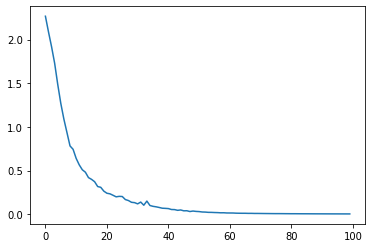

In [ ]:
history=model.fit(train_X1,train_Y_one_hot,batch_size=64,epochs=100,validation_data=(val_X,val_Y_Onehot))
plt.plot(history.history['loss'])

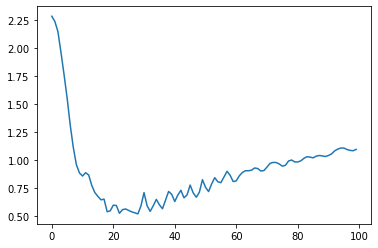

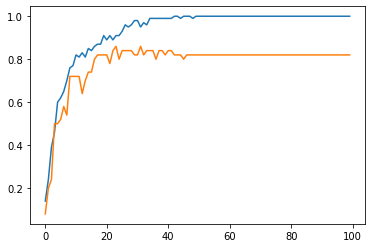

In [ ]:
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.show()

## A3

In [ ]:

score=model.evaluate(test_X[0:100],test_Y_one_hot[0:100],verbose=1) 
print('\nKeras CNN binary accuracy:',score[1],'\n')

4/4 [==============================] - 0s 30ms/step - loss: 1.7120 - accuracy: 0.6800

Keras CNN binary accuracy: 0.6800000071525574 



A4

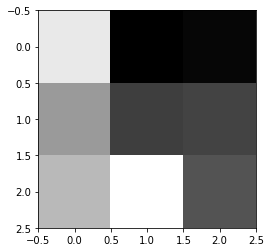

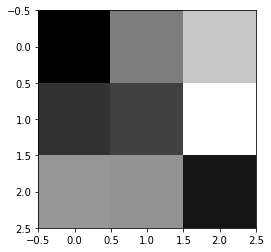

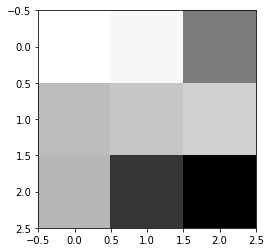

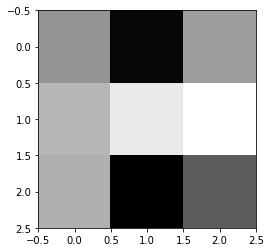

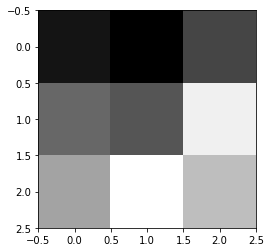

In [ ]:
filters,biases=model.layers[0].get_weights()
for i in range(5):
  plt.imshow(filters[:,:,0,i],cmap='gray') 
  plt.show()

A5

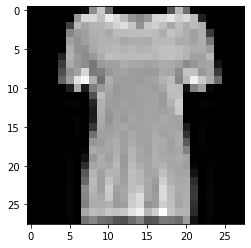

In [ ]:
from scipy import signal 
im=train_X[10]
plt.imshow(im,cmap='gray')
plt.show()

# ot=signal.convolve2d(im.reshape(28,28),filt[:,:,1].reshape(3,3),boundary='symm',mode='same')
# plt.imshow(ot,cmap='gray')
# #print(im.reshape(28,28),'\n',filt[:,:,1].reshape(3,3))#print(ot)

A6

In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from pydub import AudioSegment
from python_speech_features import mfcc
from time import time
import IPython.display as ipd
import librosa
import librosa.display

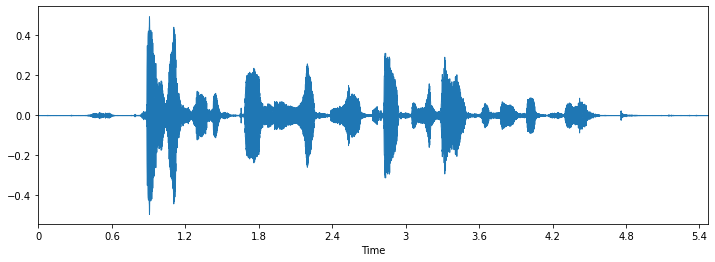

In [5]:
filename = '/content/voice1/dataset1/female-sample-000106.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
df = pd.read_csv('/content/voice1/wav_check.csv')
df.head()

,filename,gender
0,male-sample-000008.wav,male
1,male-sample-000014.wav,male
2,male-sample-000019.wav,male
3,male-sample-000020.wav,male
4,male-sample-000023.wav,male


In [7]:
TRAIN_PATH = '/content/voice/cv-valid-train/'
!pip install wavefile
!pip install helpers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wavefile: filename=wavefile-1.5-py3-none-any.whl size=11587 sha256=b0dda5d7792a5bd0b96715e8a12e301cae4cb355d5a183c5f2e4e0a410c30b26
  Stored in directory: /root/.cache/pip/wheels/fd/17/55/37a9e0c0347d7b825ad1d4947fee7ad0e46e45ea0ac1729c77
Successfully built wavefile
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
max_pad_len = 174

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        if mfccs.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]
            
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs


In [9]:

import os

fulldatasetpath = '/content/voice1/dataset1'

df = pd.read_csv('/content/voice1/wav_check.csv')


features = []


for index, row in df.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath)+'/',str(row["filename"]))
    
    class_label = row["gender"]
    data = extract_features(file_name)
    
    features.append([data, class_label])


featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  200  files


In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

**CNN ARCHITECTURE**

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

In [12]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [13]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 86, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [14]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/72
1/1 [==============================] - ETA: 0s - loss: 2.4808 - accuracy: 0.5125
Epoch 1: val_loss improved from inf to 4.02436, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 3s 3s/step - loss: 2.4808 - accuracy: 0.5125 - val_loss: 4.0244 - val_accuracy: 0.4750
Epoch 2/72
1/1 [==============================] - ETA: 0s - loss: 6.3722 - accuracy: 0.5063
Epoch 2: val_loss improved from 4.02436 to 3.08583, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 3s 3s/step - loss: 6.3722 - accuracy: 0.5063 - val_loss: 3.0858 - val_accuracy: 0.4750
Epoch 3/72
1/1 [==============================] - ETA: 0s - loss: 5.1723 - accuracy: 0.5063
Epoch 3: val_loss improved from 3.08583 to 0.97601, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 2s 2s/step - loss: 5.1723 - accuracy: 0.5063 - val_loss: 0.9760 - val_accuracy: 0.4750
Epoch 4/72
1/1 [=======

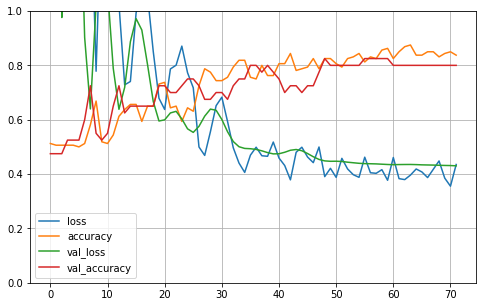

1. If the validation loss is greater(are both high:) than the training loss. The model is underfitting.
2. If the validation loss is greater than the training loss,The model is overfitting.
3. If the training loss and validation loss both decrease and stabilize at a specific point:the model is good fit


In [15]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print('1. If the validation loss is greater(are both high:) than the training loss. The model is underfitting.')
print('2. If the validation loss is greater than the training loss,The model is overfitting.')
print('3. If the training loss and validation loss both decrease and stabilize at a specific point:the model is good fit')

In [16]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1]*100,"%")

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1]*100,"%")

Training Accuracy:  86.87499761581421 %
Testing Accuracy:  80.0000011920929 %


In [17]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict(prediction_feature)
    predicted_class = le.inverse_transform(np.argmax(predicted_vector, axis=-1)) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = predicted_vector
    for i in range(len(predicted_proba_vector[0])): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba_vector[0][i]*100,'.32f'),"%")

In [18]:
filename = '/content/voice1/dataset/female-sample-000005.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 150ms/step
The predicted class is: female 

female 		 :  89.23405408859252929687500000000000 %
male 		 :  10.76594516634941101074218750000000 %
